In [102]:
import pandas as pd
from  skimage.io import imread, imshow
import pywt
import pywt.data
import matplotlib.pyplot as plt
import numpy as np
import csv as cvS
import os
from sklearn import svm                                                                                                                
import random
import pandas as pd
from sklearn.model_selection import train_test_split

Por ejemplo, el archivo
0070038, indica que es la imagen numero 38 de la especie 7. 

(185, 185, 3)

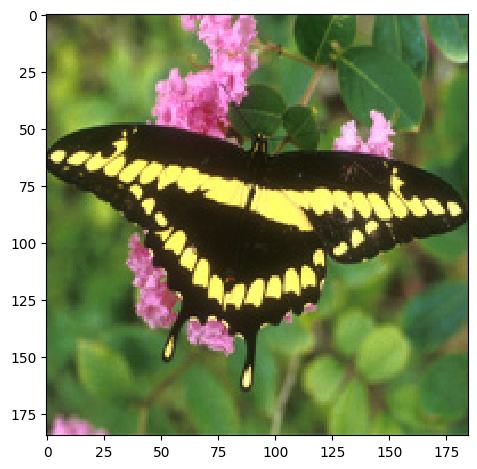

In [103]:

path = "../../../DB/dataset/"
imagen = path + '0070036.png'
picture = imread(imagen)
imshow(picture)
picture.shape

# Redimensionar el tamaño de todas las imagenes a un solo estandar (24x24)

In [104]:
import cv2
import os

def resize_image(image_path, new_resolution):
    # Carga la imagen
    image = cv2.imread(image_path)

    # Redimensiona la imagen a la nueva resolución
    resized_image = cv2.resize(image, new_resolution)

    return resized_image

# Ruta de la carpeta de entrada
input_folder = "../../../DB/dataset/"

# Ruta de la carpeta de salida para imágenes redimensionadas
output_folder = "../../../DB/dataset_redimention_48x48/"

# Nueva resolución deseada
new_resolution = (24, 24)

# Asegúrate de que la carpeta de salida exista, o créala si no existe
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Lista de nombres de archivos en la carpeta de entrada
nameFiles = os.listdir(input_folder)

# Itera sobre cada archivo en la carpeta de entrada
for image_name in nameFiles:
    # Ruta de la imagen de entrada
    input_image_path = os.path.join(input_folder, image_name)

    # Genera el nombre de archivo de salida
    output_image_path = os.path.join(output_folder, image_name)

    # Llama a la función para redimensionar y guardar la imagen
    resized_image = resize_image(input_image_path, new_resolution)

    # Guarda la imagen redimensionada en la carpeta de salida con el mismo nombre
    cv2.imwrite(output_image_path, resized_image)


# Organizar las especies de las mariposas por su codigo de imagen

In [105]:
pathList = [] # listas de rutas de las imagenes para clasificarlas ( 10 especies )
path = "../../../DB/dataset_redimention_48x48/"
nameFiles = os.listdir(path) # te da una lista de todas las rutas de las imagenes

clasificacion = [] # este es una matriz que tendra 10 listas ya que son 10 especies

# Creo la matriz vacia de tamaño 10 
for i in range(1,12):
    lista = [] 
    clasificacion.append(lista) 

#Clasifico las imagenes segun su index - tener en cuenta que la posicion 0 no hay nada
for image in nameFiles : 
    clasificacion[int(image[1:3])].append(image) 

print(clasificacion[10])

['0100003.png', '0100005.png', '0100006.png', '0100008.png', '0100009.png', '0100012.png', '0100016.png', '0100018.png', '0100019.png', '0100020.png', '0100022.png', '0100023.png', '0100024.png', '0100025.png', '0100028.png', '0100029.png', '0100030.png', '0100031.png', '0100034.png', '0100036.png', '0100037.png', '0100038.png', '0100039.png', '0100041.png', '0100042.png', '0100044.png', '0100045.png', '0100047.png', '0100050.png', '0100051.png', '0100054.png', '0100058.png', '0100067.png', '0100072.png', '0100077.png', '0100079.png', '0100082.png', '0100086.png', '0100089.png', '0100091.png', '0100092.png', '0100093.png', '0100096.png', '0100097.png', '0100099.png', '0100107.png', '0100110.png', '0100111.png', '0100113.png', '0100115.png', '0100119.png', '0100120.png', '0100122.png', '0100123.png', '0100124.png', '0100126.png', '0100128.png', '0100130.png', '0100132.png', '0100133.png', '0100134.png', '0100136.png', '0100137.png', '0100143.png', '0100145.png', '0100147.png', '0100148.

# Hacer Cortes a la Imgen ( hard wavelet)

In [106]:
def   Get_Feacture(picture, cortes):
  LL = picture
  for i in range(cortes):
     LL, (LH, HL, HH) = pywt.dwt2(LL, 'haar')
  return LL.flatten()

# Hacer cortes a toda una carpeta de imagenes

In [107]:
def Get_Feacture_file(rutaCarpeta, listaNombre, cortes):
    LL_list = []
    for code in listaNombre:
        ruta = rutaCarpeta + code
        picture = imread(ruta)
        features = Get_Feacture(picture, cortes)  # Ahora Get_Feacture devuelve una lista
        LL_list.append(features)
    return LL_list


# Almacenar los vectores caracteristicos en un archivo CVS

In [108]:
def Create_DataBase_CVS(nombreArchivo,LL_list,etiqueta):
    data = {}    

    for i in range(len(LL_list[0])):
        index = "C" + str(i+1)
        data[index] = []            
     
    for vector in LL_list:
        for j in range(len(vector)):
            index = "C" + str(j+1)
            #print(index)
            data[index].append(vector[j])       

    data["Etiqueta"] = etiqueta
    df = pd.DataFrame(data)
    df.to_csv(nombreArchivo, index=False) # index=False evita que se incluya el índice en el archivo CSV

In [109]:
path = "../../../DB/dataset_redimention_48x48/"
#os.mkdir("VC_Especies")
for i in range(1,11):    
    LL_list = Get_Feacture_file(path,clasificacion[i],2)
    Create_DataBase_CVS("VC_Especies/VC_Especie_" + str(i) + ".cvs",LL_list,i)   



# Combinar todos los archivos CVS a uno solo de manera al azar

In [110]:
# Especifica la carpeta que contiene los archivos CSV
path = 'VC_Especies/'

# Lista todos los archivos CSV en la carpeta
nameFiles = os.listdir(path)

# Crea una lista para almacenar todas las filas de los archivos CSV
all_rows = []

# Lee cada archivo CSV, guarda sus filas en la lista all_rows
for archivo_csv in nameFiles:
    ruta_completa = os.path.join(path, archivo_csv)
    df = pd.read_csv(ruta_completa)
    all_rows.extend(df.values.tolist())

# Mezcla todas las filas de manera aleatoria
random.shuffle(all_rows)

# Crea un DataFrame a partir de las filas mezcladas
resultado = pd.DataFrame(all_rows, columns=df.columns)

# Guarda el resultado en un nuevo archivo CSV
resultado.to_csv('Vectores_Caracteristicos_Mariposas.csv', index=False)


# Modelo Logistico



### Extraer Informacion del DataBase

In [111]:
dataset = pd.read_csv('Vectores_Caracteristicos_Mariposas.csv')

X = dataset[dataset.columns]
X.insert(0,"bias",1)
Y = dataset["Etiqueta"]

### Hipótesis
- Ecuación de la recta o Hiperplano
\begin{equation}
h(x_i) = w_0 + w_1x_i^1 +  w_2x_i^2 ... w_kx_i^k
\end{equation} \\

- Ecuación de la función sigmoidea (clasificador binario)
\begin{equation}
s(x_i) = \frac{1}{1 + e^{-h(x)}}
\end{equation}

In [112]:
def h(X, W):
    return np.dot(X, W.T)

def s(X, W):
    return 1 / (1 + np.exp(-h(X, W)))

### Loss Function (Cross-Entropy)

\begin{equation}
L = -\frac{1}{n}\sum_{i=0}^n(y_ilog(s(x_i)) + (1-y_i)log(1-s(x_i)))  
\end{equation} \\


In [113]:
def Loss(X,Y,W):
    especial = 0.000001
    loss = -np.mean(Y * np.log(s(X, W) + especial) + (1 - Y) * np.log(1 - s(X, W) + especial))
    return loss

### Derivatives

\begin{equation}
\frac{\partial L}{\partial w_j} = \frac{1}{n}\sum_{i=0}^n(y_i - s(x_i))(-x_i^j)
\end{equation} \\

Nota:  $x_i^j$ se refiere a la característica $j-esima$ del objeto $i-esimo$ de entrenamiento


In [114]:
def Derivatives(X,Y,W):
    n = len(X)

    dw = np.dot(X.T, (s(X, W) - Y)) / n
    
    return dw    

### Change parameters

\begin{equation}
 w_j = w_i - \alpha\frac{\partial L}{\partial w_j}
\end{equation}

In [115]:
def ChangeParameters(W , Derivatives, alpha):
    return  W - alpha * Derivatives    

### Trainning

In [116]:
def train_one_vs_all(X, Y, class_label, epochs, alpha):
    binary_labels = (Y == class_label).astype(int)
    W = np.random.random(X.shape[1])
    loss = []
    for i in range(epochs):
        DW = Derivatives(X, binary_labels, W)
        W = ChangeParameters(W, DW, alpha)
        L = Loss(X, binary_labels, W)
        loss.append(L)
        if (i % 1000) == 0:
            print(f"Class {class_label + 1} - Loss value error: {L}")
    return W, loss

def train(X, Y, num_classes, epochs, alpha):
    train_weights = {}
    train_losses = {}
    
    for class_label in range(num_classes):
        W, loss = train_one_vs_all(X, Y, class_label, epochs, alpha)
        train_weights[class_label] = W
        train_losses[class_label] = loss
    
    return train_weights, train_losses

### Testing


In [117]:
def test(X, class_weights):
    probabilities = np.zeros((X.shape[0], len(class_weights)))
    for class_label, weight in class_weights.items():
        probabilities[:, class_label] = s(X, weight)
    return np.argmax(probabilities, axis=1)

### Database

In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
dataset = pd.read_csv('Vectores_Caracteristicos_Mariposas.csv')

X = dataset[dataset.columns].values
Y = dataset["Etiqueta"].values

# Dividir los datos en conjuntos de entrenamiento, validación y prueba (70% entrenamiento, 15% validación, 15% prueba)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Agregar una columna de sesgo a los datos normalizados
X_train = np.insert(X_train, 0, 1, axis=1)
X_val = np.insert(X_val, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)


In [119]:
num_classes = 10
epochs = 1000
alpha = 0.01
train_weights, train_losses = train(X_train, Y_train, num_classes, epochs, alpha)

Class 1 - Loss value error: 5.333899703301432
Class 1 - Loss value error: 0.14178451339904594
Class 1 - Loss value error: 0.058490009674828106
Class 1 - Loss value error: 0.036498058826860524
Class 1 - Loss value error: 0.026480361383020568
Class 1 - Loss value error: 0.020768591438612764
Class 1 - Loss value error: 0.01708202729310408
Class 1 - Loss value error: 0.014507065462377886
Class 1 - Loss value error: 0.012607242999115878
Class 1 - Loss value error: 0.011147961988799596
Class 1 - Loss value error: 0.009991960698993463
Class 1 - Loss value error: 0.009053605611573099
Class 1 - Loss value error: 0.00827671619511928
Class 1 - Loss value error: 0.007622910125996624
Class 1 - Loss value error: 0.007065074800810739
Class 1 - Loss value error: 0.006583515119754993
Class 1 - Loss value error: 0.006163579826099817
Class 1 - Loss value error: 0.005794144302592438
Class 1 - Loss value error: 0.005466609832328119
Class 1 - Loss value error: 0.0051742252699669405
Class 2 - Loss value erro

In [123]:
test_result = test(X_test, train_weights)

In [124]:
num_predicciones_correctas = np.sum(test_result == Y_test)
precision = num_predicciones_correctas / len(Y_test)

print("Precisión en el conjunto de prueba:", precision)

Precisión en el conjunto de prueba: 0.456


In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Función para realizar Bootstrap
def bootstrap(X, Y, num_samples, sample_size, num_classes, epochs, alpha):
    bootstrap_samples = []
    for _ in range(num_samples):
        # Muestrear con reemplazo
        indices = np.random.choice(len(X), size=sample_size, replace=True)
        bootstrap_X = X[indices]
        bootstrap_Y = Y[indices]
        bootstrap_samples.append((bootstrap_X, bootstrap_Y))
    return bootstrap_samples

In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Función para realizar Bootstrap
def bootstrap(X, Y, num_samples, sample_size):
    bootstrap_samples = []
    for _ in range(num_samples):
        # Muestrear con reemplazo
        indices = np.random.choice(len(X), size=sample_size, replace=True)
        bootstrap_X = X[indices]
        bootstrap_Y = Y[indices]
        bootstrap_samples.append((bootstrap_X, bootstrap_Y))
    return bootstrap_samples

# Función para entrenar un modelo de clasificación
def train_and_evaluate(X_train, Y_train, X_val, Y_val, num_classes, epochs, alpha):
    train_weights, train_losses = train(X_train, Y_train, num_classes, epochs, alpha)
    
    # Evaluar el modelo en el conjunto de validación
    val_result = test(X_val, train_weights)
    
    num_correct = np.sum(val_result == Y_val)
    accuracy = num_correct / len(Y_val)
    
    return train_weights, train_losses, accuracy

# Configuración
num_classes = 10
epochs = 1000
alpha = 0.01
num_bootstrap_samples = 5

# Cargar los datos y dividirlos
dataset = pd.read_csv('Vectores_Caracteristicos_Mariposas.csv')
X = dataset[dataset.columns].values
Y = dataset["Etiqueta"].values
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Agregar una columna de sesgo a los datos normalizados
X_train = np.insert(X_train, 0, 1, axis=1)
X_val = np.insert(X_val, 0, 1, axis=1)

# Realizar Bootstrap
bootstrap_samples = bootstrap(X_train, Y_train, num_bootstrap_samples, len(X_train))

# Almacenar las precisiones en cada muestra Bootstrap
bootstrap_accuracies = []

for i, (bootstrap_X, bootstrap_Y) in enumerate(bootstrap_samples):
    print(f"Training Bootstrap Sample {i + 1}/{num_bootstrap_samples}")
    
    # Entrenar y evaluar el modelo en la muestra Bootstrap actual
    train_weights, train_losses, accuracy = train_and_evaluate(bootstrap_X, bootstrap_Y, X_val, Y_val, num_classes, epochs, alpha)
    
    bootstrap_accuracies.append(accuracy)

# Calcular el intervalo de confianza del 95% para la precisión
confidence_interval = np.percentile(bootstrap_accuracies, [2.5, 97.5])

print(f"Intervalo de confianza del 95% para la precisión: {confidence_interval[0]:.4f} - {confidence_interval[1]:.4f}")

# Mostrar gráficamente las curvas de pérdida
for class_label, loss in train_losses.items():
    plt.plot(range(epochs), loss, label=f"Class {class_label + 1} loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Training Bootstrap Sample 1/5
Class 1 - Loss value error: 5.2256983579975005
Class 2 - Loss value error: 5.2650253419275534
Class 3 - Loss value error: 6.260602644898668
Class 4 - Loss value error: 5.820414567784882
Class 5 - Loss value error: 5.369179476110764
Class 6 - Loss value error: 5.411945927807259
Class 7 - Loss value error: 4.710829815364274
Class 8 - Loss value error: 5.925109592605428
Class 9 - Loss value error: 4.835029916047841
Class 10 - Loss value error: 5.175195784569214
Training Bootstrap Sample 2/5
Class 1 - Loss value error: 5.268390546611798
Class 2 - Loss value error: 5.465108073734044
Class 3 - Loss value error: 6.14757481125334
Class 4 - Loss value error: 5.573029482032374
Class 5 - Loss value error: 5.5105915702227515
Class 6 - Loss value error: 5.280383362705985
Class 7 - Loss value error: 4.272887765306543
Class 8 - Loss value error: 5.922709735372113
Class 9 - Loss value error: 4.692783884523793
Class 10 - Loss value error: 4.9218744911479595
Training Bootst

In [154]:
import pandas as pd

# Función para crear una tabla con valores de precisión, recuperación y F1-Score
def create_results_table(bootstrap_accuracies, precision_values, recall_values, f1_scores):
    results_df = pd.DataFrame({
        'Bootstrap Sample': range(1, len(bootstrap_accuracies) + 1),
        'Accuracy': bootstrap_accuracies,
        'Precision': precision_values,
        'Recall': recall_values,
        'F1-Score': f1_scores
    })
    return results_df

# Después de calcular bootstrap_accuracies, precision_values, recall_values y f1_scores
results_table = create_results_table(bootstrap_accuracies, precision_values, recall_values, f1_scores)

# Mostrar la tabla de resultados
print(results_table)


NameError: name 'precision_values' is not defined

Training Bootstrap Sample 1/5
Class 1 - Loss value error: 5.857163836127839
Class 2 - Loss value error: 5.738354600760561
Class 3 - Loss value error: 6.884867584275873
Class 4 - Loss value error: 6.351994591152277
Class 5 - Loss value error: 5.764619521810672
Class 6 - Loss value error: 5.670269563656545
Class 7 - Loss value error: 4.925940277990664
Class 8 - Loss value error: 6.436910999780896
Class 9 - Loss value error: 5.24562327768816
Class 10 - Loss value error: 5.503879000704095
Training Bootstrap Sample 2/5
Class 1 - Loss value error: 4.7977874369484415
Class 2 - Loss value error: 5.065340557800013
Class 3 - Loss value error: 6.140938293427468
Class 4 - Loss value error: 5.33083194466783
Class 5 - Loss value error: 4.538828618835797
Class 6 - Loss value error: 5.173767841392092
Class 7 - Loss value error: 4.247656863744977
Class 8 - Loss value error: 5.521632906014886
Class 9 - Loss value error: 4.469799027800916
Class 10 - Loss value error: 5.027842478358288
Training Bootstrap 

### Grafica

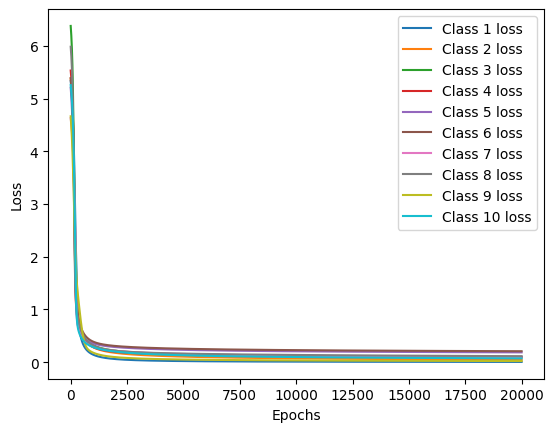

In [125]:
for class_label, loss in train_losses.items():
    plt.plot(range(epochs), loss, label=f"Class {class_label + 1} loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
